# <font color = blue>[Exploratory Data Analysis]</font>

## <font color = blue>Import Packages</font>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import datetime

## <font color = blue>Import Data</font>

In [15]:
df = pd.read_csv("./Cleaned Data/cleaned_brands_df.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5600 entries, 0 to 5599
Columns: 348 entries, brand_id to Promoted
dtypes: float64(2), int64(344), object(2)
memory usage: 14.9+ MB


In [3]:
df.head()

,brand_id,planLevel,num_sub_user,role,bantScore,companySize,onboarding_stage,country,Advertising,Aerospace&Defense,...,lastActive_month,lastActive_day,created_weekday,created_weekofyear,created_quarter,lastActive_weekday,lastActive_weekofyear,lastActive_quarter,active_time,Promoted
0,2,0,1,brand,67.0,0,4.0,United States,0,0,...,1,7,4,35,3,3,1,1,132,0
1,3,0,1,brand,67.0,0,4.0,Other,0,0,...,10,28,4,34,3,2,44,4,67,0
2,4,0,1,founder,67.0,0,2.0,United States,0,0,...,7,1,3,26,3,3,26,3,0,0
3,5,0,1,brand,67.0,0,4.0,India,0,0,...,12,20,0,49,4,4,51,4,17,0
4,6,0,1,brand,67.0,0,4.0,United States,0,0,...,8,3,0,32,3,0,32,3,0,0


In [33]:
pd.set_option('display.max_rows', None)
df.dtypes

brand_id                                     int64
planLevel                                    int64
num_sub_user                                 int64
role                                        object
bantScore                                  float64
companySize                                  int64
onboarding_stage                           float64
country                                     object
Advertising                                  int64
Aerospace&Defense                            int64
Agricultural&FarmMachinery                   int64
AgriculturalProducts                         int64
AirFreight&Logistics                         int64
Airlines                                     int64
AirportServices                              int64
AlternativeCarriers                          int64
Aluminum                                     int64
AmusementParks                               int64
AnimalAdoption                               int64
AnimalShelter                  

## <font color = blue>EDA</font>

In [16]:
promoted_df = df.loc[~df['planLevel'].isin(['0'])]
no_promoted_df = df.loc[df['planLevel'].isin(['0'])]

In [17]:
promoted_df.shape#Only 65 brands chose to promote the plan.

(65, 348)

In [18]:
no_promoted_df.shape

(5535, 348)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5600 entries, 0 to 5599
Columns: 346 entries, brand_id to Promoted
dtypes: float64(2), int64(344)
memory usage: 14.8 MB


In [10]:
import pandas_profiling as prof

In [23]:
#prof.ProfileReport(df)

In [3]:
brands_df = pd.read_csv("./Raw Data/sample_brands - data.csv")

In [5]:
def promote(row):  
    if row['planLevel'] == 0:
        return '0'
    return '1'
brands_df['label'] = brands_df.apply(lambda row: promote(row), axis=1)

In [13]:
brands_df['industry_categories'] = brands_df['industry_categories'].str.replace('[','') #Remove Brackets
brands_df['industry_categories'] = brands_df['industry_categories'].str.replace(']','') 
brands_df = brands_df.dropna()

In [14]:
#WordClouds
import graphviz
import nltk
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from nltk.stem.snowball import SnowballStemmer


In [15]:
brands_df["label"].value_counts().to_frame()

stopwords = nltk.corpus.stopwords.words('english')
stopwords.append("https")
stopwords.append("http")
stemmer = SnowballStemmer("english")
# Vectorize
label = brands_df["label"]
def tokenization_and_stemming(text):
    tokens = []
    for word in nltk.word_tokenize(text):
        if word.lower() not in stopwords:
            tokens.append(word.lower())
                
    filtered_tokens = []
                    
    for token in tokens:
        if token.encode("UTF-8").isalpha():
            filtered_tokens.append(token)
                            
# stemming
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems
                    
tfidf_model = TfidfVectorizer(max_df=0.99, max_features=100, min_df=0.01, use_idf=True, tokenizer=tokenization_and_stemming, ngram_range=(1,1))

tfidf_matrix = tfidf_model.fit_transform(brands_df.industry_categories.tolist())
tf_selected_words = tfidf_model.get_feature_names()
body_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=tf_selected_words)
body_tfidf.head()



,beverag,biotechnolog,care,coach,design,direct,drink,durabl,entertain,equip,...,profession,retail,scienc,servic,sock,softwar,store,supplement,technolog,top
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.840394,0.0,0.0,0.541976,0.0,0.0,0.0,0.0,0.0,0.0
2,0.315222,0.0,0.0,0.0,0.0,0.0,0.949018,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
words_gme = [tokenization_and_stemming(text) for text in brands_df[brands_df["label"]=="1"]["industry_categories"]]
words_gme_str = ""
for word_list in words_gme:
    for word in word_list:
        words_gme_str += word + " "
        
words_nongme = [tokenization_and_stemming(text) for text in brands_df[brands_df["label"]=="0"]["industry_categories"]]
words_nongme_str = ""
for word_list in words_nongme:
    for word in word_list:
        words_nongme_str += word + " "


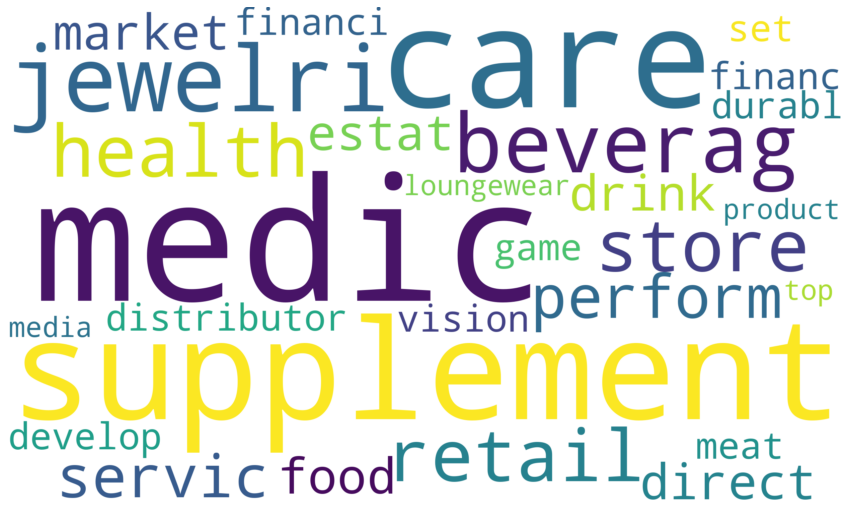

<Figure size 432x288 with 0 Axes>

In [21]:
#WordCloud For Upgraded
WordCloud_gme = WordCloud(background_color = "white", width=2500, height=1500).generate(words_gme_str)
plt.figure(figsize=(15,30))
plt.imshow(WordCloud_gme, interpolation='bilinear')
plt.axis('off')
plt.show()

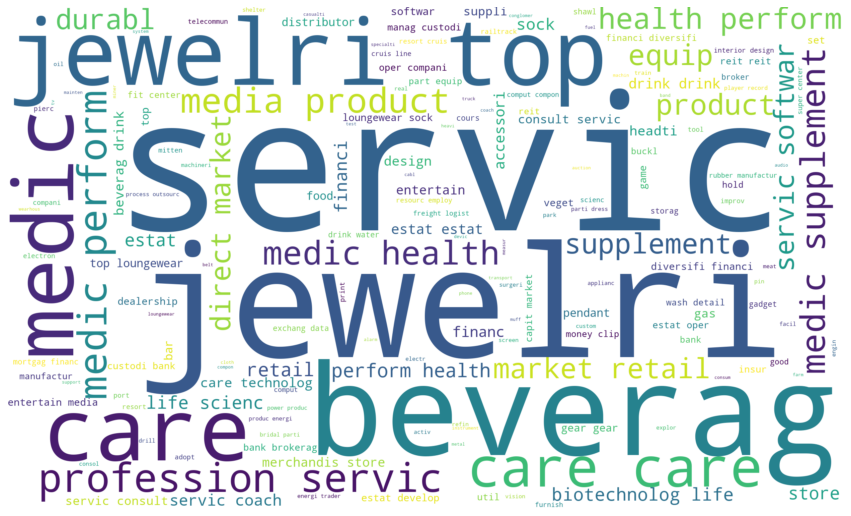

<Figure size 432x288 with 0 Axes>

In [22]:
#WordCloud for not Upgraded
WordCloud_nongme = WordCloud(background_color = "white", width=2500, height=1500).generate(words_nongme_str)
plt.figure(figsize=(15,30))
plt.imshow(WordCloud_nongme, interpolation='bilinear')
plt.axis('off')
plt.show()